In [1]:
## Lets make a really simple Monte Carlo just using Na2O compos

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
import matplotlib.transforms as transforms

In [22]:
df=pt.import_excel('Cpx-Data.xlsx', sheet_name='Cpx_Liq_For_Thermobarometry')
df_Cpx=df['Cpxs']
df_Liq=df['Liqs']
cpx_Glass=df['my_input']
df_Cpx.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,47.080,2.707,4.159,16.639,0.290,10.057,16.688,0.049,0.005,0.312,CE5-27-2
1,45.937,3.624,4.969,16.558,0.284,9.725,16.924,0.083,0.011,0.335,CE5-27-3
2,47.257,2.983,5.248,14.082,0.234,11.193,17.262,0.099,0.004,0.754,5-28-1-06
3,47.147,3.061,5.006,13.957,0.222,11.442,17.131,0.079,0.012,0.688,5-28-1-08
4,47.168,2.547,4.315,16.685,0.289,12.176,14.461,0.073,0.000,0.698,5-28-1-09


In [23]:
CalcPT=pt.calculate_cpx_liq_press_temp(cpx_comps=df_Cpx, liq_comps=df_Liq,
                    equationT='T_Put2008_eq33',
                    equationP='P_Neave2017', eq_tests=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [24]:
df_Liq.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,42.580316,6.262111,10.586435,23.049465,0.295767,4.579296,11.871494,0.346762,0.071392,0.142784,0.214176,0.0,0.0,0.0,0.0,0.0,0
1,42.580316,6.262111,10.586435,23.049465,0.295767,4.579296,11.871494,0.346762,0.071392,0.142784,0.214176,0.0,0.0,0.0,0.0,0.0,1
2,42.580316,6.262111,10.586435,23.049465,0.295767,4.579296,11.871494,0.346762,0.071392,0.142784,0.214176,0.0,0.0,0.0,0.0,0.0,2
3,42.580316,6.262111,10.586435,23.049465,0.295767,4.579296,11.871494,0.346762,0.071392,0.142784,0.214176,0.0,0.0,0.0,0.0,0.0,3
4,42.580316,6.262111,10.586435,23.049465,0.295767,4.579296,11.871494,0.346762,0.071392,0.142784,0.214176,0.0,0.0,0.0,0.0,0.0,4


In [25]:
Liqs_no_noise_100=pt.add_noise_sample_1phase(phase_comp=df_Liq,
                        noise_percent=0, duplicates=100, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [26]:
df_Cpx['Sample_ID_Cpx']=df_Cpx.index
Cpx_PredNa2O=pt.add_noise_sample_1phase(phase_comp=df_Cpx, variable="Na2O",
variable_err=cpx_Glass['Na2O_Cpx_Err_Estimated'], 
variable_err_type="Perc", duplicates=100, err_dist="normal")

Cpx_PredNa2O

got to here
Na2O_Cpx_Err
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx_Num,Sample_ID_Cpx
0,47.080,2.707,4.159,16.639,0.290,10.057,16.688,0.044334,0.005,0.312,0.0,0
1,47.080,2.707,4.159,16.639,0.290,10.057,16.688,0.046340,0.005,0.312,0.0,0
2,47.080,2.707,4.159,16.639,0.290,10.057,16.688,0.061897,0.005,0.312,0.0,0
3,47.080,2.707,4.159,16.639,0.290,10.057,16.688,0.049717,0.005,0.312,0.0,0
4,47.080,2.707,4.159,16.639,0.290,10.057,16.688,0.066830,0.005,0.312,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7595,46.832,2.648,3.677,14.467,0.254,11.456,17.172,0.058736,0.000,0.619,75.0,75
7596,46.832,2.648,3.677,14.467,0.254,11.456,17.172,0.052045,0.000,0.619,75.0,75
7597,46.832,2.648,3.677,14.467,0.254,11.456,17.172,0.050743,0.000,0.619,75.0,75
7598,46.832,2.648,3.677,14.467,0.254,11.456,17.172,0.067700,0.000,0.619,75.0,75


In [27]:
test_err_JustNa=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_PredNa2O, liq_comps=Liqs_no_noise_100,
                    equationT='T_Put2008_eq33',
                    equationP='P_Neave2017', eq_tests=True)
test_err_JustNa.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_P_kbar_Iter,Delta_T_K_Iter,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,2.949873,1424.470030,False,0.0,0.0,0.059892,0.176010,0.008359,0.092730,0.016907,...,-0.008359,0.017758,-0.016907,0.025101,0.020266,0.037493,0.022247,0.001531,0.001839,0.001839
1,3.230524,1427.261075,False,0.0,0.0,0.059256,0.175368,0.010208,0.090124,0.016695,...,-0.010208,0.017792,-0.016695,0.025101,0.020266,0.037459,0.022381,0.001531,0.001992,0.001992
2,5.094935,1445.939794,False,0.0,0.0,0.055032,0.171068,0.021954,0.073631,0.015091,...,-0.021954,0.018013,-0.015091,0.025101,0.020266,0.037243,0.023380,0.001531,0.003173,0.003173
3,3.678857,1431.730909,False,0.0,0.0,0.058241,0.174340,0.013117,0.086030,0.016341,...,-0.013117,0.017846,-0.016341,0.025101,0.020266,0.037406,0.022604,0.001531,0.002248,0.002248
4,5.597380,1451.014511,False,0.0,0.0,0.053891,0.169898,0.024966,0.069419,0.014595,...,-0.024966,0.018071,-0.014595,0.025101,0.020266,0.037187,0.023684,0.001531,0.003548,0.003548


In [28]:
Stats_P_kbar_cpx_only_Na=pt.av_noise_samples_series(calc=test_err_JustNa['P_kbar_calc'],
                                     sampleID=test_err_JustNa['Sample_ID_Cpx_Num'])
Stats_P_kbar_cpx_only_Na

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,100,3.308157,3.594983,2.062149,7.384318,-1.722364
1,1.0,100,6.679398,6.647566,1.339800,9.257690,3.343036
2,2.0,100,8.054636,8.261955,1.273917,11.764339,4.596068
3,3.0,100,6.544738,6.670846,1.574219,9.565557,1.849373
4,4.0,100,6.984934,7.205072,1.710089,10.457593,2.091970
...,...,...,...,...,...,...,...
71,71.0,100,1.550859,2.186094,3.120498,9.349324,-9.374945
72,72.0,100,5.792783,6.092557,1.881024,9.631403,-2.313556
73,73.0,100,4.434812,4.906401,2.093250,8.255557,-2.591736
74,74.0,100,3.806302,4.224419,2.319390,8.567653,-7.969347


In [29]:
Stats_Na_cpx_only_Na=pt.av_noise_samples_series(calc=test_err_JustNa['Na2O_Cpx'],
                                     sampleID=test_err_JustNa['Sample_ID_Cpx_Num'])
Stats_Na_cpx_only_Na

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,100,0.049096,0.049072,0.015036,0.087385,0.020651
1,1.0,100,0.079386,0.077616,0.015500,0.113940,0.046724
2,2.0,100,0.097889,0.099372,0.017731,0.163914,0.057228
3,3.0,100,0.078795,0.078394,0.017413,0.119891,0.037082
4,4.0,100,0.071388,0.071763,0.016683,0.114778,0.032725
...,...,...,...,...,...,...,...
71,71.0,100,0.033257,0.034163,0.015786,0.101102,0.000000
72,72.0,100,0.071800,0.072679,0.017815,0.122186,0.018898
73,73.0,100,0.056312,0.058049,0.015498,0.095844,0.017215
74,74.0,100,0.052251,0.053034,0.015369,0.101728,0.006727


# Errors for all major elements where we have them

In [30]:
df_we=pt.import_excel('Cpx-Data.xlsx', sheet_name='Cpx_Liq_Witherrors')
df_Cpx_we=df_we['Cpxs']
df_Liq_we=df_we['Liqs']
cpx_Glass_we=df_we['my_input']


df_err=pt.import_excel_errors('Cpx-Data.xlsx', sheet_name='Cpx_Liq_Witherrors')
df_Cpx_err=df_err['Cpxs_Err']


df_Liq_err=df_err['Liqs_Err']


In [31]:
not_in_we = ~cpx_Glass['Sample_ID_Cpx'].isin(cpx_Glass_we['Sample_ID_Cpx'])

In [ ]:


Liqs_no_noise_100=pt.add_noise_sample_1phase(phase_comp=df_Liq_we,
                        noise_percent=0, duplicates=10000, err_dist="normal")

Cpxs_st_noise_100=pt.add_noise_sample_1phase(phase_comp=df_Cpx_we, phase_err=df_Cpx_err,
                                             phase_err_type="Perc", duplicates=10000, err_dist="normal")
Cpxs_st_noise_100



test_err_100=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs_st_noise_100, liq_comps=Liqs_no_noise_100, equationT='T_Put2008_eq33',
                                equationP='P_Neave2017', eq_tests=True)
Stats_P_kbar_100=pt.av_noise_samples_series(calc=test_err_100['P_kbar_calc'],
                                     sampleID=test_err_100['Sample_ID_Cpx_Num'])

Stats_T_K_100=pt.av_noise_samples_series(calc=test_err_100['T_K_calc'],
                                     sampleID=test_err_100['Sample_ID_Cpx_Num'])

# Calculate PTs for these ones
CalcPT_we=pt.calculate_cpx_liq_press_temp(cpx_comps=df_Cpx_we, liq_comps=df_Liq_we,
                    equationT='T_Put2008_eq33',
                    equationP='P_Neave2017', eq_tests=True)


All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [14]:
## Some averages from their PTs
Mean_all=np.nanmean(CalcPT['P_kbar_calc'])
Mean_errs=np.nanmean(CalcPT_we['P_kbar_calc'])
Std_all=np.nanstd(CalcPT['P_kbar_calc'])
Std_errs=np.nanstd(CalcPT_we['P_kbar_calc'])

In [15]:
Mean_Na2O=np.mean(cpx_Glass['Na2O_Cpx'])

#cpx_Glass_we

target_value = Mean_Na2O
diff = np.abs(cpx_Glass_we['Na2O_Cpx'] - target_value)
idx_closest = diff.idxmin()
row_closest = cpx_Glass_we.loc[idx_closest]
sam_to_use=row_closest['Sample_ID_Cpx']

In [16]:
# calculate the mean value of 'Na2O_Cpx' in cpx_Glass
Mean_Na2O = np.mean(cpx_Glass_we['Na2O_Cpx'])

# find the closest value in cpx_Glass_we
diff = np.abs(cpx_Glass_we['Na2O_Cpx'] - Mean_Na2O)
idx_closest = diff.idxmin()
row_closest = cpx_Glass_we.loc[idx_closest]
sam_to_use = row_closest['Sample_ID_Cpx']

# find the 5 closest values in 'Na2O_Cpx'
diff_all = np.abs(cpx_Glass_we['Na2O_Cpx'] - Mean_Na2O)
idx_sorted = diff_all.argsort()
top5 = cpx_Glass_we.iloc[idx_sorted[:5]]

In [17]:
top5

,Unnamed: 0,Sample_ID_Cpx,Ref,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
24,24,B1-97,Che,46.155,2.896,4.185,17.616,0.306,9.654,16.230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,22,B1-94,Che,45.840,3.640,4.670,17.105,0.312,10.859,15.466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,21,B1-92,Che,45.232,3.869,5.076,16.296,0.293,10.220,16.174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,26_2-03,THIStudy,48.654,2.380,4.039,15.170,0.275,12.167,16.463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,12-203-12,THIStudy,48.697,2.348,3.024,16.278,0.293,10.657,17.588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def confidence_ellipse(x, y, ax, n_std=1, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [19]:
top5['Sample_ID_Cpx']
#B1-92


24        B1-97
22        B1-94
21        B1-92
11      26_2-03
9     12-203-12
Name: Sample_ID_Cpx, dtype: object

NameError: name 'transforms' is not defined

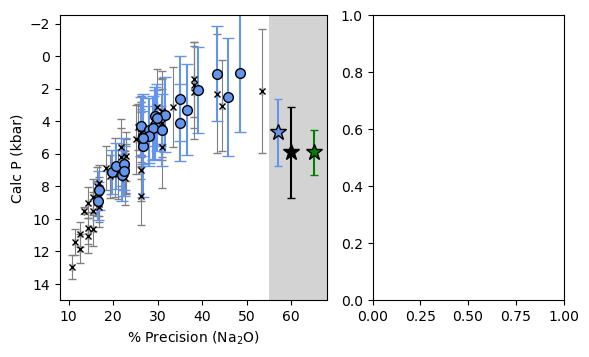

In [20]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig, ((ax1),(ax2)) = plt.subplots(1, 2, figsize=(6.5,3.7),gridspec_kw={'width_ratios': [4.2, 3]})
#plt.subplots_adjust(wspace=0, hspace=0)
ax1.errorbar(
             cpx_Glass['Na2O_Cpx_Err_Estimated'].loc[not_in_we],
             CalcPT['P_kbar_calc'].loc[not_in_we],
              
              xerr=0, yerr=Stats_P_kbar_cpx_only_Na['St_dev_calc'].loc[not_in_we],
             fmt='x', ecolor='grey', elinewidth=0.8, mfc='k', ms=5, mec='k', capsize=3)

ax1.errorbar(cpx_Glass_we['Na2O_Cpx_Err_Estimated'],
             CalcPT_we['P_kbar_calc'],
             xerr=0, yerr=Stats_P_kbar_100['St_dev_calc'],
             fmt='o', ecolor='cornflowerblue', elinewidth=1.5, mfc='cornflowerblue', ms=7, mec='k', capsize=4)
             
ax1.errorbar(65,
              Mean_all,
             xerr=0, yerr=1.4,
             fmt='*k', ecolor='g', elinewidth=1.5, mfc='green', capsize=3, ms=12, zorder=100)

ax1.errorbar(60,
              Mean_all,
             xerr=0, yerr=Std_all,
             fmt='*k', ecolor='black', elinewidth=1.5, mfc='black', capsize=3, ms=12, zorder=100)

ax1.errorbar(57,
              Mean_errs,
             xerr=0, yerr=Std_errs,
             fmt='*k', ecolor='cornflowerblue', elinewidth=1.5, mfc='cornflowerblue', capsize=3, ms=12, zorder=100)


import matplotlib.patches as patches
from matplotlib.patches import Ellipse
rect = patches.Rectangle((55, -3),15,3+15,linewidth=1,edgecolor='None',facecolor='lightgrey', label='test')
# Add the patch to the Axes
ax1.add_patch(rect)
ax1.set_ylim([-2.5, 15])
ax1.set_xlim([8, 68])
ax1.set_ylabel('Calc P (kbar)')
ax1.set_xlabel('% Precision (Na$_2$O)')
ax1.invert_yaxis()

# Second axis, find one closest to mean, plot mpl error ellipse
# x2=CalcPT['P_kbar_calc'].values
# y2=CalcPT['T_K_calc'].values

samples=['B1-97', '26_2-03']#, '26_2-04']
for sam in samples:
    test=test_err_100.loc[test_err_100['Sample_ID_Cpx']==sam]
    y2=test['P_kbar_calc'].values
    x2=test['T_K_calc'].values-273.15

    # Find non-NaN indices
    idx = ~np.isnan(y2) & ~np.isnan(x2)

    # Use boolean indexing to extract non-NaN values
    y2_nonan = y2[idx]
    x2_nonan = x2[idx]

    confidence_ellipse(x2_nonan, y2_nonan, ax2, edgecolor='cornflowerblue')
    ax2.scatter(mu[0], mu[1], c='cornflowerblue', s=3)

# y3=CalcPT['P_kbar_calc'].values
# x3=CalcPT['T_K_calc'].values-273.15

# confidence_ellipse(x3, y3, ax2, edgecolor='k')
# ax2.scatter(mu[0], mu[1], c='cornflowerblue', s=3)

y4=CalcPT_we['P_kbar_calc'].values
x4=CalcPT_we['T_K_calc'].values-273.15

confidence_ellipse(x4, y4, ax2, edgecolor='cornflowerblue', linestyle='--')
ax2.scatter(mu[0], mu[1], c='cornflowerblue', s=3)

ax2.set_xlim([1140, 1200])
ax2.set_ylim([7,2])
#ax2.plot(x3, y3, 'x', mfc='cornflowerblue', alpha=0.3)
ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax2.set_xlabel('T (°C)')
ax2.set_ylabel('P (kbar)')
fig.savefig('Errors_kbar.png', dpi=300, transparent=True)
# ellipse=pt.matplotlib_confidence_ellipse(x2, y2, ax2, n_std=1,
#                    label=r'$1\sigma$ All published PT', 
#                    edgecolor='magenta', facecolor='magenta', alpha=0.3)

# print(ellipse)

# ax1.add_patch(ellipse)
# ax1.add_artist(ellipse)



In [ ]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig, ((ax1),(ax2)) = plt.subplots(1, 2, figsize=(6.5,3.7),gridspec_kw={'width_ratios': [4.2, 3]})
#plt.subplots_adjust(wspace=0, hspace=0)
ax1.errorbar(
             cpx_Glass['Na2O_Cpx_Err_Estimated'].loc[not_in_we],
             CalcPT['P_kbar_calc'].loc[not_in_we],
              
              xerr=0, yerr=Stats_P_kbar_cpx_only_Na['St_dev_calc'].loc[not_in_we],
             fmt='x', ecolor='grey', elinewidth=0.8, mfc='k', ms=5, mec='k', capsize=3)

ax1.errorbar(cpx_Glass_we['Na2O_Cpx_Err_Estimated'],
             CalcPT_we['P_kbar_calc'],
             xerr=0, yerr=Stats_P_kbar_100['St_dev_calc'],
             fmt='o', ecolor='cornflowerblue', elinewidth=1.5, mfc='cornflowerblue', ms=7, mec='k', capsize=4)
             
ax1.errorbar(65,
              Mean_all,
             xerr=0, yerr=1.4,
             fmt='*k', ecolor='g', elinewidth=1.5, mfc='green', capsize=3, ms=12, zorder=100)

ax1.errorbar(60,
              Mean_all,
             xerr=0, yerr=Std_all,
             fmt='*k', ecolor='black', elinewidth=1.5, mfc='black', capsize=3, ms=12, zorder=100)

ax1.errorbar(57,
              Mean_errs,
             xerr=0, yerr=Std_errs,
             fmt='*k', ecolor='cornflowerblue', elinewidth=1.5, mfc='cornflowerblue', capsize=3, ms=12, zorder=100)


import matplotlib.patches as patches
import matplotlib.transforms as transforms
rect = patches.Rectangle((55, -3),15,3+15,linewidth=1,edgecolor='None',facecolor='lightgrey', label='test')
# Add the patch to the Axes
ax1.add_patch(rect)
ax1.set_ylim([-2.5, 15])
ax1.set_xlim([8, 68])
ax1.set_ylabel('Calc P (kbar)')
ax1.set_xlabel('% Precision (Na$_2$O)')
ax1.invert_yaxis()

# Second axis, find one closest to mean, plot mpl error ellipse
# x2=CalcPT['P_kbar_calc'].values
# y2=CalcPT['T_K_calc'].values

# samples=['B1-97', '26_2-03']#, '26_2-04']
# for sam in samples:
#     test=test_err_100.loc[test_err_100['Sample_ID_Cpx']==sam]
#     y2=test['P_kbar_calc'].values
#     x2=test['T_K_calc'].values-273.15

#     # Find non-NaN indices
#     idx = ~np.isnan(y2) & ~np.isnan(x2)

#     # Use boolean indexing to extract non-NaN values
#     y2_nonan = y2[idx]
#     x2_nonan = x2[idx]

#     confidence_ellipse(x2_nonan, y2_nonan, ax2, edgecolor='cornflowerblue')
#     ax2.scatter(mu[0], mu[1], c='cornflowerblue', s=3)

# y3=CalcPT['P_kbar_calc'].values
# x3=CalcPT['T_K_calc'].values-273.15

# confidence_ellipse(x3, y3, ax2, edgecolor='k')
# ax2.scatter(mu[0], mu[1], c='cornflowerblue', s=3)

y4=CalcPT_we['P_kbar_calc'].values
x4=CalcPT_we['T_K_calc'].values-273.15

confidence_ellipse(x4, y4, ax2, edgecolor='cornflowerblue', linestyle='--')
ax2.scatter(1, 0, c='cornflowerblue', s=3)

ax2.set_xlim([1140, 1200])
ax2.set_ylim([7,2])
#ax2.plot(x3, y3, 'x', mfc='cornflowerblue', alpha=0.3)
ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax2.set_xlabel('T (°C)')
ax2.set_ylabel('P (kbar)')
fig.savefig('Errors_kbar.png', dpi=300, transparent=True)
# ellipse=pt.matplotlib_confidence_ellipse(x2, y2, ax2, n_std=1,
#                    label=r'$1\sigma$ All published PT', 
#                    edgecolor='magenta', facecolor='magenta', alpha=0.3)

# print(ellipse)

# ax1.add_patch(ellipse)
# ax1.add_artist(ellipse)



In [ ]:
Std_errs

In [ ]:
np.max(Stats_P_kbar_100['St_dev_calc'])

In [ ]:
np.min(Stats_P_kbar_100['St_dev_calc'])

In [ ]:
np.mean(Stats_T_K_100['St_dev_calc'])